In [39]:
from random import SystemRandom
import time
random = SystemRandom().randrange

In [40]:
def perfect_square(number):
    if number < 0:
        return False
    if number < 2:
        return True
    root = math.sqrt(number)
    if int(root + 0.5) ** 2 == number:
        return True
    else:
        return False
    
def ab_select(number):
    a, b = random(1, number), random(1, number)
    desc = pow(a,2) - 4 * b
    while perfect_square(delta) or math.gcd(2 * desc * a * b, number) != 1:
        a, b = random(1, number), random(1, number)
        delta = a ** 2 - 4 * b
    return a, b, delta
    
def euclide_ext_gcd(a, b):
    if a == 0:
        return b, 0, 1
    else:
        gcd, x, y = euclide_ext_gcd(b % a, a)
        return gcd, y - (b // a) * x, x
    
def jacobi(n, d):
    j = 1
    while n:
        while not n & 1:
            n >>= 1
            if d & 7 in {3, 5}:
                j = -j
        n, d = d, n
        if n & 3 == 3 == d & 3:
            j = -j
        n %= d
    return j if d == 1 else 0

def calc_seq(w1,m,n):
    a, b = 2, w1
    bits = int(math.log(m,2)) - 2
    if bits < 0:
        bits = 0
    mask = 1 << bits
    while mask <= m:
        mask <<= 1
    mask >>= 1
    while mask > 0:
        if (mask & m) != 0:
            a, b = (a*b-w1)%n, (b*b-2)%n
        else:
            a, b = (a*a-2)%n, (a*b-w1)%n
        mask >>= 1
    return a, b

In [41]:
def is_number_prime(number, atmp):
    if not (perfect_square(number)):
        it = 0
        while it != atmp:
            if not frobenius_prime(number):
                print('Iteration ', it + 1, ' Not prime: ', number)
                it += 1
                continue
            else:
                print('Iteration ', it + 1, ' Absolutely prime: ', number)
                return number
        print('Number isn\'t prime!\n')
    else:
        print('Number is perfect square!\n')

    
def find_prime_number(bits, atmp):
    number = random((1 << bits - 1) + 1, 1 << bits, 2)
    print('Bottom border of possible prime: ', (1 << bits - 1) + 1)
    print('Upper border of possible prime: ', 1 << bits, '\n\n')
    while True:
        if perfect_square(number):
            number += 2
        it = 0
        while it != atmp:
                if not frobenius_prime(number):
                    print('Iteration ', it + 1, ' Not prime: ', number)
                    it += 1
                    continue
                else:
                    print('Iteration ', it + 1, ' Absolutely prime: ', number)
                    return number
        number += 2


def frobenius_prime(number):
    assert number & 1 and number >= 3
    a, b, d = ab_select(number)
    w1 = (a ** 2 * euclide_ext_gcd(b, number)[1] - 2) % number
    m = (number - jacobi(d, number)) >> 1
    wm, wm1 = calc_seq(w1, m, number)
    if w1 * wm != 2 * wm1 % number:
        return False
    b = pow(b, (number - 1) >> 1, number)
    return b * wm % number == 2

In [4]:
time_list = list()
bits = 10
reps = 50

powers = list()

while bits < 200:
    powers.append(bits)
    curr = list()
    for i in range(reps):
        start=time.time()
        find_prime_number(bits, 10)
        end=time.time()
        curr.append(end-start)
    time_list.append(curr)
    bits += 2

Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  2  Absolutely prime:  709
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  4  Absolutely prime:  599
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  2  Absolutely prime:  1009
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  3  Absolutely prime:  757
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  1  Absolutely prime:  991
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  3  Absolutely prime:  997
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  1  Absolutely prime:  607
Bottom border of possible prime:  513
Upper border of possible prime:  1024 


Iteration  6  Absolutely prime:  547
Bottom border of possible prime:  513
Upper border of possible prime:  

Iteration  9  Absolutely prime:  2999
Bottom border of possible prime:  2049
Upper border of possible prime:  4096 


Iteration  2  Absolutely prime:  3209
Bottom border of possible prime:  2049
Upper border of possible prime:  4096 


Iteration  3  Absolutely prime:  2579
Bottom border of possible prime:  2049
Upper border of possible prime:  4096 


Iteration  3  Absolutely prime:  3793
Bottom border of possible prime:  8193
Upper border of possible prime:  16384 


Iteration  8  Absolutely prime:  15901
Bottom border of possible prime:  8193
Upper border of possible prime:  16384 


Iteration  2  Absolutely prime:  14479
Bottom border of possible prime:  8193
Upper border of possible prime:  16384 


Iteration  3  Absolutely prime:  16333
Bottom border of possible prime:  8193
Upper border of possible prime:  16384 


Iteration  3  Absolutely prime:  8969
Bottom border of possible prime:  8193
Upper border of possible prime:  16384 


Iteration  7  Absolutely prime:  12577
Bottom bo

Iteration  7  Absolutely prime:  64679
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  4  Absolutely prime:  42611
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  9  Absolutely prime:  47807
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  2  Absolutely prime:  39989
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  1  Absolutely prime:  53197
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  1  Absolutely prime:  63761
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  2  Absolutely prime:  43093
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  1  Absolutely prime:  51043
Bottom border of possible prime:  32769
Upper border of possible prime:  65536 


Iteration  2  Absolutely prime: 

Iteration  6  Absolutely prime:  779131
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  6  Absolutely prime:  951437
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  2  Absolutely prime:  615833
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  2  Absolutely prime:  914533
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  3  Absolutely prime:  815869
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  2  Absolutely prime:  641239
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  2  Absolutely prime:  726809
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 


Iteration  2  Absolutely prime:  1042241
Bottom border of possible prime:  524289
Upper border of possible prime:  1048576 



Iteration  1  Absolutely prime:  2629307
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  1  Absolutely prime:  2202947
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  3  Absolutely prime:  2713589
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  6  Absolutely prime:  3317117
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  2  Absolutely prime:  3726763
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  4  Absolutely prime:  3089117
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  10  Absolutely prime:  3893171
Bottom border of possible prime:  2097153
Upper border of possible prime:  4194304 


Iteration  4  Absolutely prime:  2869541
Bottom border of possible prime:  2097153
Upper border of possible pr

Iteration  2  Absolutely prime:  59303971
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  3  Absolutely prime:  54205579
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  1  Absolutely prime:  59495987
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  2  Absolutely prime:  40831939
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  5  Absolutely prime:  64334947
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  1  Absolutely prime:  62957593
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  7  Absolutely prime:  43364521
Bottom border of possible prime:  33554433
Upper border of possible prime:  67108864 


Iteration  2  Absolutely prime:  49732951
Bottom border of possible prime:  33554433
Upper

Iteration  2  Absolutely prime:  266389181
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  1  Absolutely prime:  227096041
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  2  Absolutely prime:  156786671
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  3  Absolutely prime:  177690367
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  4  Absolutely prime:  260619683
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  4  Absolutely prime:  137701573
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  10  Absolutely prime:  235610833
Bottom border of possible prime:  134217729
Upper border of possible prime:  268435456 


Iteration  8  Absolutely prime:  168645031
Bottom border of possible

Iteration  1  Absolutely prime:  783940169
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  3  Absolutely prime:  679206733
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  4  Absolutely prime:  1016647217
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  2  Absolutely prime:  635182391
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  6  Absolutely prime:  872547769
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  1  Absolutely prime:  1067117411
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  2  Absolutely prime:  623353711
Bottom border of possible prime:  536870913
Upper border of possible prime:  1073741824 


Iteration  1  Absolutely prime:  870331601
Bottom border of 

Iteration  2  Absolutely prime:  15410545141
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  2  Absolutely prime:  16285558031
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  3  Absolutely prime:  15404501419
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  4  Absolutely prime:  9673102303
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  2  Absolutely prime:  8680712441
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  2  Absolutely prime:  16079495863
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  1  Absolutely prime:  9139448111
Bottom border of possible prime:  8589934593
Upper border of possible prime:  17179869184 


Iteration  4  Absolutely prime:  9715

Iteration  5  Absolutely prime:  63549562777
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  1  Absolutely prime:  55132517851
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  6  Absolutely prime:  58642820623
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  2  Absolutely prime:  46042300303
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  1  Absolutely prime:  63274894853
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  1  Absolutely prime:  61743479971
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  3  Absolutely prime:  53053877813
Bottom border of possible prime:  34359738369
Upper border of possible prime:  68719476736 


Iteration  4  Absolutely pr

Iteration  3  Absolutely prime:  163081525463
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iteration  3  Absolutely prime:  251699147803
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iteration  1  Absolutely prime:  157852193129
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iteration  7  Absolutely prime:  150167580133
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iteration  1  Absolutely prime:  238291234607
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iteration  4  Absolutely prime:  175721224663
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iteration  1  Absolutely prime:  237442904969
Bottom border of possible prime:  137438953473
Upper border of possible prime:  274877906944 


Iterat

Iteration  4  Absolutely prime:  2248922919427
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  4398046511104 


Iteration  1  Absolutely prime:  4275456481151
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  4398046511104 


Iteration  2  Absolutely prime:  2939282065271
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  4398046511104 


Iteration  6  Absolutely prime:  3113864945663
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  4398046511104 


Iteration  8  Absolutely prime:  3312038751677
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  4398046511104 


Iteration  2  Absolutely prime:  3671285132381
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  4398046511104 


Iteration  3  Absolutely prime:  2485343219977
Bottom border of possible prime:  2199023255553
Upper border of possible prime:  43

Iteration  6  Absolutely prime:  11470858420991
Bottom border of possible prime:  8796093022209
Upper border of possible prime:  17592186044416 


Iteration  10  Absolutely prime:  10402950347617
Bottom border of possible prime:  8796093022209
Upper border of possible prime:  17592186044416 


Iteration  1  Absolutely prime:  16472498215577
Bottom border of possible prime:  8796093022209
Upper border of possible prime:  17592186044416 


Iteration  7  Absolutely prime:  10855487409323
Bottom border of possible prime:  8796093022209
Upper border of possible prime:  17592186044416 


Iteration  2  Absolutely prime:  15643504357567
Bottom border of possible prime:  8796093022209
Upper border of possible prime:  17592186044416 


Iteration  1  Absolutely prime:  10704682252567
Bottom border of possible prime:  8796093022209
Upper border of possible prime:  17592186044416 


Iteration  1  Absolutely prime:  9831407180563
Bottom border of possible prime:  8796093022209
Upper border of possib

Iteration  5  Absolutely prime:  36673657222361
Bottom border of possible prime:  35184372088833
Upper border of possible prime:  70368744177664 


Iteration  2  Absolutely prime:  45797320565237
Bottom border of possible prime:  35184372088833
Upper border of possible prime:  70368744177664 


Iteration  4  Absolutely prime:  39453301438409
Bottom border of possible prime:  35184372088833
Upper border of possible prime:  70368744177664 


Iteration  2  Absolutely prime:  48528370995107
Bottom border of possible prime:  35184372088833
Upper border of possible prime:  70368744177664 


Iteration  9  Absolutely prime:  40617858772591
Bottom border of possible prime:  35184372088833
Upper border of possible prime:  70368744177664 


Iteration  1  Absolutely prime:  42565156144031
Bottom border of possible prime:  35184372088833
Upper border of possible prime:  70368744177664 


Iteration  1  Absolutely prime:  67120200953573
Bottom border of possible prime:  35184372088833
Upper border of

Iteration  7  Absolutely prime:  242307817446011
Bottom border of possible prime:  140737488355329
Upper border of possible prime:  281474976710656 


Iteration  2  Absolutely prime:  217223217590831
Bottom border of possible prime:  140737488355329
Upper border of possible prime:  281474976710656 


Iteration  1  Absolutely prime:  194130612529951
Bottom border of possible prime:  140737488355329
Upper border of possible prime:  281474976710656 


Iteration  1  Absolutely prime:  252519860651389
Bottom border of possible prime:  140737488355329
Upper border of possible prime:  281474976710656 


Iteration  7  Absolutely prime:  275950341370931
Bottom border of possible prime:  140737488355329
Upper border of possible prime:  281474976710656 


Iteration  3  Absolutely prime:  261973809177373
Bottom border of possible prime:  140737488355329
Upper border of possible prime:  281474976710656 


Iteration  4  Absolutely prime:  245974385928793
Bottom border of possible prime:  14073748835

Iteration  2  Absolutely prime:  684039818839589
Bottom border of possible prime:  562949953421313
Upper border of possible prime:  1125899906842624 


Iteration  2  Absolutely prime:  977214400151459
Bottom border of possible prime:  562949953421313
Upper border of possible prime:  1125899906842624 


Iteration  1  Absolutely prime:  864330967554151
Bottom border of possible prime:  562949953421313
Upper border of possible prime:  1125899906842624 


Iteration  8  Absolutely prime:  1040737735816721
Bottom border of possible prime:  562949953421313
Upper border of possible prime:  1125899906842624 


Iteration  1  Absolutely prime:  1054958601167227
Bottom border of possible prime:  562949953421313
Upper border of possible prime:  1125899906842624 


Iteration  2  Absolutely prime:  975883795345579
Bottom border of possible prime:  562949953421313
Upper border of possible prime:  1125899906842624 


Iteration  9  Absolutely prime:  954653160804367
Bottom border of possible prime:  562

Iteration  6  Absolutely prime:  3344392011319979
Bottom border of possible prime:  2251799813685249
Upper border of possible prime:  4503599627370496 


Iteration  7  Absolutely prime:  4295796714889243
Bottom border of possible prime:  2251799813685249
Upper border of possible prime:  4503599627370496 


Iteration  2  Absolutely prime:  3186244212323983
Bottom border of possible prime:  2251799813685249
Upper border of possible prime:  4503599627370496 


Iteration  3  Absolutely prime:  2542391362781827
Bottom border of possible prime:  2251799813685249
Upper border of possible prime:  4503599627370496 


Iteration  1  Absolutely prime:  3920641278914317
Bottom border of possible prime:  2251799813685249
Upper border of possible prime:  4503599627370496 


Iteration  1  Absolutely prime:  3096122290357909
Bottom border of possible prime:  2251799813685249
Upper border of possible prime:  4503599627370496 


Iteration  2  Absolutely prime:  3814591765539271
Bottom border of possible 

Iteration  1  Absolutely prime:  9157654528508599
Bottom border of possible prime:  9007199254740993
Upper border of possible prime:  18014398509481984 


Iteration  1  Absolutely prime:  9524593111905169
Bottom border of possible prime:  36028797018963969
Upper border of possible prime:  72057594037927936 


Iteration  4  Absolutely prime:  54809148195120037
Bottom border of possible prime:  36028797018963969
Upper border of possible prime:  72057594037927936 


Iteration  1  Absolutely prime:  47662973575738361
Bottom border of possible prime:  36028797018963969
Upper border of possible prime:  72057594037927936 


Iteration  10  Absolutely prime:  70002617813371279
Bottom border of possible prime:  36028797018963969
Upper border of possible prime:  72057594037927936 


Iteration  2  Absolutely prime:  42423020665566617
Bottom border of possible prime:  36028797018963969
Upper border of possible prime:  72057594037927936 


Iteration  1  Absolutely prime:  66503699671954709
Bottom bo

Iteration  4  Absolutely prime:  170968214172324407
Bottom border of possible prime:  144115188075855873
Upper border of possible prime:  288230376151711744 


Iteration  6  Absolutely prime:  285910185386059517
Bottom border of possible prime:  144115188075855873
Upper border of possible prime:  288230376151711744 


Iteration  6  Absolutely prime:  279285656834325523
Bottom border of possible prime:  144115188075855873
Upper border of possible prime:  288230376151711744 


Iteration  8  Absolutely prime:  161485803773157191
Bottom border of possible prime:  144115188075855873
Upper border of possible prime:  288230376151711744 


Iteration  3  Absolutely prime:  171776887378524889
Bottom border of possible prime:  144115188075855873
Upper border of possible prime:  288230376151711744 


Iteration  1  Absolutely prime:  165997725817979431
Bottom border of possible prime:  144115188075855873
Upper border of possible prime:  288230376151711744 


Iteration  2  Absolutely prime:  2533636

Bottom border of possible prime:  576460752303423489
Upper border of possible prime:  1152921504606846976 


Iteration  2  Absolutely prime:  917594593965361483
Bottom border of possible prime:  576460752303423489
Upper border of possible prime:  1152921504606846976 


Iteration  2  Absolutely prime:  879809841245133413
Bottom border of possible prime:  576460752303423489
Upper border of possible prime:  1152921504606846976 


Iteration  3  Absolutely prime:  1121535909029168729
Bottom border of possible prime:  576460752303423489
Upper border of possible prime:  1152921504606846976 


Iteration  2  Absolutely prime:  704148672407098489
Bottom border of possible prime:  576460752303423489
Upper border of possible prime:  1152921504606846976 


Iteration  5  Absolutely prime:  1132352939154673559
Bottom border of possible prime:  576460752303423489
Upper border of possible prime:  1152921504606846976 


Iteration  4  Absolutely prime:  941643249884854613
Bottom border of possible prime:

Iteration  1  Absolutely prime:  4286090292325695017
Bottom border of possible prime:  2305843009213693953
Upper border of possible prime:  4611686018427387904 


Iteration  9  Absolutely prime:  3693152192373136943
Bottom border of possible prime:  2305843009213693953
Upper border of possible prime:  4611686018427387904 


Iteration  4  Absolutely prime:  4433968788562852103
Bottom border of possible prime:  2305843009213693953
Upper border of possible prime:  4611686018427387904 


Iteration  4  Absolutely prime:  4342247166064246129
Bottom border of possible prime:  2305843009213693953
Upper border of possible prime:  4611686018427387904 


Iteration  1  Absolutely prime:  4033650461660889119
Bottom border of possible prime:  2305843009213693953
Upper border of possible prime:  4611686018427387904 


Iteration  4  Absolutely prime:  2899982085235505971
Bottom border of possible prime:  2305843009213693953
Upper border of possible prime:  4611686018427387904 


Iteration  4  Absolute

Iteration  1  Absolutely prime:  9295893643543960069
Bottom border of possible prime:  9223372036854775809
Upper border of possible prime:  18446744073709551616 


Iteration  2  Absolutely prime:  17823011369391546673
Bottom border of possible prime:  9223372036854775809
Upper border of possible prime:  18446744073709551616 


Iteration  2  Absolutely prime:  10547921410227236137
Bottom border of possible prime:  9223372036854775809
Upper border of possible prime:  18446744073709551616 


Iteration  1  Absolutely prime:  9568833799084632197
Bottom border of possible prime:  9223372036854775809
Upper border of possible prime:  18446744073709551616 


Iteration  5  Absolutely prime:  13250018009923000171
Bottom border of possible prime:  9223372036854775809
Upper border of possible prime:  18446744073709551616 


Iteration  3  Absolutely prime:  14579909561095231849
Bottom border of possible prime:  9223372036854775809
Upper border of possible prime:  18446744073709551616 


Iteration  6

Iteration  1  Absolutely prime:  60968488815326831107
Bottom border of possible prime:  36893488147419103233
Upper border of possible prime:  73786976294838206464 


Iteration  1  Absolutely prime:  55998395327289288847
Bottom border of possible prime:  36893488147419103233
Upper border of possible prime:  73786976294838206464 


Iteration  3  Absolutely prime:  55701055133826046309
Bottom border of possible prime:  36893488147419103233
Upper border of possible prime:  73786976294838206464 


Iteration  1  Absolutely prime:  42799807951988543059
Bottom border of possible prime:  36893488147419103233
Upper border of possible prime:  73786976294838206464 


Iteration  2  Absolutely prime:  51372264727490846593
Bottom border of possible prime:  36893488147419103233
Upper border of possible prime:  73786976294838206464 


Iteration  1  Absolutely prime:  46085577285553424783
Bottom border of possible prime:  36893488147419103233
Upper border of possible prime:  73786976294838206464 


Iter

Iteration  5  Absolutely prime:  185565651197736198919
Bottom border of possible prime:  147573952589676412929
Upper border of possible prime:  295147905179352825856 


Iteration  4  Absolutely prime:  157903714233544457723
Bottom border of possible prime:  147573952589676412929
Upper border of possible prime:  295147905179352825856 


Iteration  3  Absolutely prime:  181270292262870645833
Bottom border of possible prime:  147573952589676412929
Upper border of possible prime:  295147905179352825856 


Iteration  3  Absolutely prime:  288098331647677358207
Bottom border of possible prime:  147573952589676412929
Upper border of possible prime:  295147905179352825856 


Iteration  4  Absolutely prime:  154655668103044454299
Bottom border of possible prime:  147573952589676412929
Upper border of possible prime:  295147905179352825856 


Iteration  5  Absolutely prime:  177374909232026220709
Bottom border of possible prime:  147573952589676412929
Upper border of possible prime:  29514790517

Iteration  10  Absolutely prime:  815856774506328458107
Bottom border of possible prime:  590295810358705651713
Upper border of possible prime:  1180591620717411303424 


Iteration  7  Absolutely prime:  708797283135145288873
Bottom border of possible prime:  590295810358705651713
Upper border of possible prime:  1180591620717411303424 


Iteration  5  Absolutely prime:  1166545006914002062427
Bottom border of possible prime:  590295810358705651713
Upper border of possible prime:  1180591620717411303424 


Iteration  1  Absolutely prime:  793308656167347814213
Bottom border of possible prime:  590295810358705651713
Upper border of possible prime:  1180591620717411303424 


Iteration  4  Absolutely prime:  1067976189163931013871
Bottom border of possible prime:  590295810358705651713
Upper border of possible prime:  1180591620717411303424 


Iteration  7  Absolutely prime:  874999983211890665477
Bottom border of possible prime:  590295810358705651713
Upper border of possible prime:  118

Iteration  2  Absolutely prime:  4633741994799783598157
Bottom border of possible prime:  2361183241434822606849
Upper border of possible prime:  4722366482869645213696 


Iteration  1  Absolutely prime:  4522650124738894242319
Bottom border of possible prime:  2361183241434822606849
Upper border of possible prime:  4722366482869645213696 


Iteration  4  Absolutely prime:  2720875094107766146613
Bottom border of possible prime:  2361183241434822606849
Upper border of possible prime:  4722366482869645213696 


Iteration  3  Absolutely prime:  4163814568915581639817
Bottom border of possible prime:  2361183241434822606849
Upper border of possible prime:  4722366482869645213696 


Iteration  1  Absolutely prime:  2807515398402825499981
Bottom border of possible prime:  2361183241434822606849
Upper border of possible prime:  4722366482869645213696 


Iteration  4  Absolutely prime:  3277449720444886089703
Bottom border of possible prime:  2361183241434822606849
Upper border of possible pr

Iteration  2  Absolutely prime:  11939100705981745570111
Bottom border of possible prime:  9444732965739290427393
Upper border of possible prime:  18889465931478580854784 


Iteration  1  Absolutely prime:  14342734143026970157699
Bottom border of possible prime:  9444732965739290427393
Upper border of possible prime:  18889465931478580854784 


Iteration  9  Absolutely prime:  13028239327204987906859
Bottom border of possible prime:  9444732965739290427393
Upper border of possible prime:  18889465931478580854784 


Iteration  1  Absolutely prime:  16154987284942522389031
Bottom border of possible prime:  9444732965739290427393
Upper border of possible prime:  18889465931478580854784 


Iteration  1  Absolutely prime:  16518959728628867959919
Bottom border of possible prime:  9444732965739290427393
Upper border of possible prime:  18889465931478580854784 


Iteration  8  Absolutely prime:  10914410859468070308899
Bottom border of possible prime:  9444732965739290427393
Upper border of 

Iteration  2  Absolutely prime:  69525297774751093600571
Bottom border of possible prime:  37778931862957161709569
Upper border of possible prime:  75557863725914323419136 


Iteration  2  Absolutely prime:  46711040566783513349783
Bottom border of possible prime:  37778931862957161709569
Upper border of possible prime:  75557863725914323419136 


Iteration  3  Absolutely prime:  71067188349325602543377
Bottom border of possible prime:  37778931862957161709569
Upper border of possible prime:  75557863725914323419136 


Iteration  4  Absolutely prime:  49642602436574918087371
Bottom border of possible prime:  37778931862957161709569
Upper border of possible prime:  75557863725914323419136 


Iteration  1  Absolutely prime:  55250275234747938680191
Bottom border of possible prime:  37778931862957161709569
Upper border of possible prime:  75557863725914323419136 


Iteration  1  Absolutely prime:  56849079860785095362387
Bottom border of possible prime:  37778931862957161709569
Upper bord

Iteration  2  Absolutely prime:  237849562729829837788891
Bottom border of possible prime:  151115727451828646838273
Upper border of possible prime:  302231454903657293676544 


Iteration  5  Absolutely prime:  266737514476851654409169
Bottom border of possible prime:  151115727451828646838273
Upper border of possible prime:  302231454903657293676544 


Iteration  1  Absolutely prime:  246026796113291808342103
Bottom border of possible prime:  151115727451828646838273
Upper border of possible prime:  302231454903657293676544 


Iteration  6  Absolutely prime:  181015849627603215615139
Bottom border of possible prime:  151115727451828646838273
Upper border of possible prime:  302231454903657293676544 


Iteration  1  Absolutely prime:  234033898141791599868437
Bottom border of possible prime:  151115727451828646838273
Upper border of possible prime:  302231454903657293676544 


Iteration  1  Absolutely prime:  299035473442924914346817
Bottom border of possible prime:  151115727451828646

Iteration  6  Absolutely prime:  1082516043474766291020977
Bottom border of possible prime:  604462909807314587353089
Upper border of possible prime:  1208925819614629174706176 


Iteration  2  Absolutely prime:  1009131885578455799405689
Bottom border of possible prime:  604462909807314587353089
Upper border of possible prime:  1208925819614629174706176 


Iteration  4  Absolutely prime:  964607579020540574749381
Bottom border of possible prime:  604462909807314587353089
Upper border of possible prime:  1208925819614629174706176 


Iteration  6  Absolutely prime:  934077653216969897779021
Bottom border of possible prime:  604462909807314587353089
Upper border of possible prime:  1208925819614629174706176 


Iteration  7  Absolutely prime:  709859231879759009732903
Bottom border of possible prime:  604462909807314587353089
Upper border of possible prime:  1208925819614629174706176 


Iteration  1  Absolutely prime:  1043111452410156469664893
Bottom border of possible prime:  6044629098

Iteration  4  Absolutely prime:  4156761184930776856568221
Bottom border of possible prime:  2417851639229258349412353
Upper border of possible prime:  4835703278458516698824704 


Iteration  1  Absolutely prime:  4530555547519967702693081
Bottom border of possible prime:  2417851639229258349412353
Upper border of possible prime:  4835703278458516698824704 


Iteration  4  Absolutely prime:  3527754290738868828867431
Bottom border of possible prime:  2417851639229258349412353
Upper border of possible prime:  4835703278458516698824704 


Iteration  1  Absolutely prime:  4215131720736869647099271
Bottom border of possible prime:  2417851639229258349412353
Upper border of possible prime:  4835703278458516698824704 


Iteration  4  Absolutely prime:  3826410651366223472765327
Bottom border of possible prime:  2417851639229258349412353
Upper border of possible prime:  4835703278458516698824704 


Iteration  8  Absolutely prime:  2587761242501026994012423
Bottom border of possible prime:  24

Iteration  5  Absolutely prime:  11675932307950584965905709
Bottom border of possible prime:  9671406556917033397649409
Upper border of possible prime:  19342813113834066795298816 


Iteration  1  Absolutely prime:  16869538161128138439097591
Bottom border of possible prime:  9671406556917033397649409
Upper border of possible prime:  19342813113834066795298816 


Iteration  4  Absolutely prime:  16620648842710494532279349
Bottom border of possible prime:  9671406556917033397649409
Upper border of possible prime:  19342813113834066795298816 


Iteration  2  Absolutely prime:  11275230086196682421432777
Bottom border of possible prime:  9671406556917033397649409
Upper border of possible prime:  19342813113834066795298816 


Iteration  1  Absolutely prime:  11046143569230903728985941
Bottom border of possible prime:  9671406556917033397649409
Upper border of possible prime:  19342813113834066795298816 


Iteration  2  Absolutely prime:  16958393803486679086806157
Bottom border of possible

Iteration  1  Absolutely prime:  75834742159429980542141243
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  3  Absolutely prime:  68106372464462461595110759
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  3  Absolutely prime:  54061433351430371800970207
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  3  Absolutely prime:  41186966299931270170425989
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  9  Absolutely prime:  56942708202637972124654401
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  6  Absolutely prime:  53933411769529327273403317
Bottom border of pos

Iteration  1  Absolutely prime:  75344512022750993060696891
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  1  Absolutely prime:  71781291442591630097711311
Bottom border of possible prime:  38685626227668133590597633
Upper border of possible prime:  77371252455336267181195264 


Iteration  6  Absolutely prime:  62000666853959307906848329
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  2  Absolutely prime:  308414221612081138033718947
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  2  Absolutely prime:  270683310440333773439449523
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  6  Absolutely prime:  177819034366382999511458993
Bottom bord

Iteration  2  Absolutely prime:  265181480150646093311573323
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  1  Absolutely prime:  183829655958876934341281941
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  1  Absolutely prime:  188727949279705308252507941
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  4  Absolutely prime:  306768570182187805561772257
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  2  Absolutely prime:  281207363061426429952726601
Bottom border of possible prime:  154742504910672534362390529
Upper border of possible prime:  309485009821345068724781056 


Iteration  7  Absolutely prime:  290016876869635149841309613
Bott

Iteration  3  Absolutely prime:  684916047899452864003677761
Bottom border of possible prime:  618970019642690137449562113
Upper border of possible prime:  1237940039285380274899124224 


Iteration  7  Absolutely prime:  770164569860788065582218641
Bottom border of possible prime:  618970019642690137449562113
Upper border of possible prime:  1237940039285380274899124224 


Iteration  5  Absolutely prime:  805189523828619153478276481
Bottom border of possible prime:  618970019642690137449562113
Upper border of possible prime:  1237940039285380274899124224 


Iteration  2  Absolutely prime:  1105824280077331731183267577
Bottom border of possible prime:  618970019642690137449562113
Upper border of possible prime:  1237940039285380274899124224 


Iteration  5  Absolutely prime:  1080653711865650593786606363
Bottom border of possible prime:  618970019642690137449562113
Upper border of possible prime:  1237940039285380274899124224 


Iteration  5  Absolutely prime:  8037679923984330221182384

Iteration  2  Absolutely prime:  3279387634889126536856863427
Bottom border of possible prime:  2475880078570760549798248449
Upper border of possible prime:  4951760157141521099596496896 


Iteration  1  Absolutely prime:  3055167332481430098300951893
Bottom border of possible prime:  2475880078570760549798248449
Upper border of possible prime:  4951760157141521099596496896 


Iteration  2  Absolutely prime:  4336222326567478358337292399
Bottom border of possible prime:  2475880078570760549798248449
Upper border of possible prime:  4951760157141521099596496896 


Iteration  2  Absolutely prime:  2828432552948792344372663163
Bottom border of possible prime:  2475880078570760549798248449
Upper border of possible prime:  4951760157141521099596496896 


Iteration  2  Absolutely prime:  4452859761063270687668110787
Bottom border of possible prime:  2475880078570760549798248449
Upper border of possible prime:  4951760157141521099596496896 


Iteration  1  Absolutely prime:  36802383090312470

Iteration  5  Absolutely prime:  17126182462671717561928410607
Bottom border of possible prime:  9903520314283042199192993793
Upper border of possible prime:  19807040628566084398385987584 


Iteration  1  Absolutely prime:  19702858176829643001187191581
Bottom border of possible prime:  9903520314283042199192993793
Upper border of possible prime:  19807040628566084398385987584 


Iteration  6  Absolutely prime:  15354429341808228037534710301
Bottom border of possible prime:  9903520314283042199192993793
Upper border of possible prime:  19807040628566084398385987584 


Iteration  8  Absolutely prime:  14960291834328833728871157499
Bottom border of possible prime:  9903520314283042199192993793
Upper border of possible prime:  19807040628566084398385987584 


Iteration  1  Absolutely prime:  19490377985192781779986301863
Bottom border of possible prime:  9903520314283042199192993793
Upper border of possible prime:  19807040628566084398385987584 


Iteration  2  Absolutely prime:  1589790

Iteration  5  Absolutely prime:  46384167166687372205627768323
Bottom border of possible prime:  39614081257132168796771975169
Upper border of possible prime:  79228162514264337593543950336 


Iteration  6  Absolutely prime:  79107562557656607293732399971
Bottom border of possible prime:  39614081257132168796771975169
Upper border of possible prime:  79228162514264337593543950336 


Iteration  2  Absolutely prime:  72526126263764164079631132731
Bottom border of possible prime:  39614081257132168796771975169
Upper border of possible prime:  79228162514264337593543950336 


Iteration  3  Absolutely prime:  60266524020612329816614991713
Bottom border of possible prime:  39614081257132168796771975169
Upper border of possible prime:  79228162514264337593543950336 


Iteration  2  Absolutely prime:  52484315483248588620450152221
Bottom border of possible prime:  39614081257132168796771975169
Upper border of possible prime:  79228162514264337593543950336 


Iteration  2  Absolutely prime:  46

Iteration  3  Absolutely prime:  233549443711892038599665143829
Bottom border of possible prime:  158456325028528675187087900673
Upper border of possible prime:  316912650057057350374175801344 


Iteration  2  Absolutely prime:  258692301501555679437910841209
Bottom border of possible prime:  158456325028528675187087900673
Upper border of possible prime:  316912650057057350374175801344 


Iteration  3  Absolutely prime:  164379925585461577229651388713
Bottom border of possible prime:  158456325028528675187087900673
Upper border of possible prime:  316912650057057350374175801344 


Iteration  6  Absolutely prime:  187371571208946133996725357953
Bottom border of possible prime:  158456325028528675187087900673
Upper border of possible prime:  316912650057057350374175801344 


Iteration  1  Absolutely prime:  197937709049329616867383778177
Bottom border of possible prime:  158456325028528675187087900673
Upper border of possible prime:  316912650057057350374175801344 


Iteration  7  Absolu

Iteration  10  Absolutely prime:  1180536425331916084974107487461
Bottom border of possible prime:  633825300114114700748351602689
Upper border of possible prime:  1267650600228229401496703205376 


Iteration  3  Absolutely prime:  957970190713230720853750739647
Bottom border of possible prime:  633825300114114700748351602689
Upper border of possible prime:  1267650600228229401496703205376 


Iteration  6  Absolutely prime:  941555357478648666125247596117
Bottom border of possible prime:  633825300114114700748351602689
Upper border of possible prime:  1267650600228229401496703205376 


Iteration  1  Absolutely prime:  785305459823036278791101860331
Bottom border of possible prime:  633825300114114700748351602689
Upper border of possible prime:  1267650600228229401496703205376 


Iteration  8  Absolutely prime:  980481892253190962700393842641
Bottom border of possible prime:  633825300114114700748351602689
Upper border of possible prime:  1267650600228229401496703205376 


Iteration  1 

Iteration  1  Absolutely prime:  4373092678087270929372457386109
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  2  Absolutely prime:  4934653260700695060095331695431
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  5  Absolutely prime:  3305374961567425573222344041771
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  1  Absolutely prime:  3134868541102803366325334725021
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  1  Absolutely prime:  2570174550693549435556832253847
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Itera

Iteration  3  Absolutely prime:  4386825958595691974299087669901
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  2  Absolutely prime:  3361505576426169988734682943951
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  2  Absolutely prime:  2625136133682240749928452505467
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  4  Absolutely prime:  3023124658819252724912202516803
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Iteration  5  Absolutely prime:  2832063572306209125504502233671
Bottom border of possible prime:  2535301200456458802993406410753
Upper border of possible prime:  5070602400912917605986812821504 


Itera

Iteration  3  Absolutely prime:  11861894451956554198799517795241
Bottom border of possible prime:  10141204801825835211973625643009
Upper border of possible prime:  20282409603651670423947251286016 


Iteration  4  Absolutely prime:  16316820186765197782269290308757
Bottom border of possible prime:  10141204801825835211973625643009
Upper border of possible prime:  20282409603651670423947251286016 


Iteration  3  Absolutely prime:  15435896403034749105057364387543
Bottom border of possible prime:  10141204801825835211973625643009
Upper border of possible prime:  20282409603651670423947251286016 


Iteration  4  Absolutely prime:  19370504698016847958970602143451
Bottom border of possible prime:  10141204801825835211973625643009
Upper border of possible prime:  20282409603651670423947251286016 


Iteration  6  Absolutely prime:  13168655317174147405473878564851
Bottom border of possible prime:  10141204801825835211973625643009
Upper border of possible prime:  20282409603651670423947251

Iteration  1  Absolutely prime:  69299529927434574596999346201833
Bottom border of possible prime:  40564819207303340847894502572033
Upper border of possible prime:  81129638414606681695789005144064 


Iteration  4  Absolutely prime:  51018218346061858452892066114387
Bottom border of possible prime:  40564819207303340847894502572033
Upper border of possible prime:  81129638414606681695789005144064 


Iteration  1  Absolutely prime:  46269779473303363277306280906371
Bottom border of possible prime:  40564819207303340847894502572033
Upper border of possible prime:  81129638414606681695789005144064 


Iteration  2  Absolutely prime:  69922855749512070081044984511221
Bottom border of possible prime:  40564819207303340847894502572033
Upper border of possible prime:  81129638414606681695789005144064 


Iteration  1  Absolutely prime:  45918788733563541169418556879467
Bottom border of possible prime:  40564819207303340847894502572033
Upper border of possible prime:  81129638414606681695789005

Iteration  6  Absolutely prime:  178868081557474059718708143887131
Bottom border of possible prime:  162259276829213363391578010288129
Upper border of possible prime:  324518553658426726783156020576256 


Iteration  3  Absolutely prime:  320022240521881727555401054789117
Bottom border of possible prime:  162259276829213363391578010288129
Upper border of possible prime:  324518553658426726783156020576256 


Iteration  3  Absolutely prime:  247931903592175549285819681340417
Bottom border of possible prime:  162259276829213363391578010288129
Upper border of possible prime:  324518553658426726783156020576256 


Iteration  6  Absolutely prime:  173063211990936508414580653635419
Bottom border of possible prime:  162259276829213363391578010288129
Upper border of possible prime:  324518553658426726783156020576256 


Iteration  5  Absolutely prime:  162669198158948583283751190958559
Bottom border of possible prime:  162259276829213363391578010288129
Upper border of possible prime:  324518553658

Iteration  3  Absolutely prime:  1005148290090069891292667530230703
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  7  Absolutely prime:  1116748720563646627743492481817987
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  3  Absolutely prime:  967770475925121298381859988346901
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  8  Absolutely prime:  746959463113966043705071415877949
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  1  Absolutely prime:  771328854933285260339242469674487
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  129807

Iteration  3  Absolutely prime:  1182607628717100842665047244843093
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  1  Absolutely prime:  1279170457674393705379782522202337
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  7  Absolutely prime:  783137740173949100544936154424531
Bottom border of possible prime:  649037107316853453566312041152513
Upper border of possible prime:  1298074214633706907132624082305024 


Iteration  3  Absolutely prime:  742139650860733973311409414032723
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:  5192296858534827628530496329220096 


Iteration  4  Absolutely prime:  5119136523681548208980453514570023
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:  519

Iteration  1  Absolutely prime:  3183559755262909403595874812364249
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:  5192296858534827628530496329220096 


Iteration  1  Absolutely prime:  4486885575500981433186035889122117
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:  5192296858534827628530496329220096 


Iteration  1  Absolutely prime:  2911318303684963431042467290217257
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:  5192296858534827628530496329220096 


Iteration  2  Absolutely prime:  3359248233889221903620985758574623
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:  5192296858534827628530496329220096 


Iteration  2  Absolutely prime:  4561508708005298767772583327405811
Bottom border of possible prime:  2596148429267413814265248164610049
Upper border of possible prime:

Iteration  1  Absolutely prime:  16043016765996132205814423580004559
Bottom border of possible prime:  10384593717069655257060992658440193
Upper border of possible prime:  20769187434139310514121985316880384 


Iteration  3  Absolutely prime:  13170570369143993496879052710325121
Bottom border of possible prime:  10384593717069655257060992658440193
Upper border of possible prime:  20769187434139310514121985316880384 


Iteration  1  Absolutely prime:  13314395476737110728186021827577141
Bottom border of possible prime:  10384593717069655257060992658440193
Upper border of possible prime:  20769187434139310514121985316880384 


Iteration  1  Absolutely prime:  16724008971415811115896502880441607
Bottom border of possible prime:  10384593717069655257060992658440193
Upper border of possible prime:  20769187434139310514121985316880384 


Iteration  9  Absolutely prime:  10458076725100417735841968387196413
Bottom border of possible prime:  10384593717069655257060992658440193
Upper border of p

Iteration  1  Absolutely prime:  79153021516406737433239623636088039
Bottom border of possible prime:  41538374868278621028243970633760769
Upper border of possible prime:  83076749736557242056487941267521536 


Iteration  5  Absolutely prime:  52994281787458493983952895630036007
Bottom border of possible prime:  41538374868278621028243970633760769
Upper border of possible prime:  83076749736557242056487941267521536 


Iteration  3  Absolutely prime:  52919851783898793003242960308744913
Bottom border of possible prime:  41538374868278621028243970633760769
Upper border of possible prime:  83076749736557242056487941267521536 


Iteration  3  Absolutely prime:  43300213748251708416670732343920229
Bottom border of possible prime:  41538374868278621028243970633760769
Upper border of possible prime:  83076749736557242056487941267521536 


Iteration  9  Absolutely prime:  67266820200062491644779928007398257
Bottom border of possible prime:  41538374868278621028243970633760769
Upper border of p

Iteration  1  Absolutely prime:  200796998472028087476987586552050971
Bottom border of possible prime:  166153499473114484112975882535043073
Upper border of possible prime:  332306998946228968225951765070086144 


Iteration  3  Absolutely prime:  189029353780402974934916601078885803
Bottom border of possible prime:  166153499473114484112975882535043073
Upper border of possible prime:  332306998946228968225951765070086144 


Iteration  1  Absolutely prime:  267320082333876980168932262482569377
Bottom border of possible prime:  166153499473114484112975882535043073
Upper border of possible prime:  332306998946228968225951765070086144 


Iteration  2  Absolutely prime:  177920197427495283744276972297548549
Bottom border of possible prime:  166153499473114484112975882535043073
Upper border of possible prime:  332306998946228968225951765070086144 


Iteration  2  Absolutely prime:  238567558232631382450232730294039187
Bottom border of possible prime:  166153499473114484112975882535043073
Upp

Iteration  2  Absolutely prime:  311922613421505142560074644600280687
Bottom border of possible prime:  166153499473114484112975882535043073
Upper border of possible prime:  332306998946228968225951765070086144 


Iteration  1  Absolutely prime:  245243581362869361416638060596660773
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  3  Absolutely prime:  905961738374495540940690658895398903
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  4  Absolutely prime:  1275945106851788587776374322791862403
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  6  Absolutely prime:  1257408307423664269448044027040616491
Bottom border of possible prime:  66461399789245793645190353014017228

Iteration  8  Absolutely prime:  1197586211928441886096272239787827591
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  3  Absolutely prime:  1049114640376780348747639123998414163
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  1  Absolutely prime:  1169105839278516900382439064889037681
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  5  Absolutely prime:  1007011591066513429621140174604758107
Bottom border of possible prime:  664613997892457936451903530140172289
Upper border of possible prime:  1329227995784915872903807060280344576 


Iteration  2  Absolutely prime:  1304631559396995908787050212749675361
Bottom border of possible prime:  6646139978924579364519035301401

Iteration  8  Absolutely prime:  4275031298381604101674119260440456157
Bottom border of possible prime:  2658455991569831745807614120560689153
Upper border of possible prime:  5316911983139663491615228241121378304 


Iteration  1  Absolutely prime:  4144531078097176345812111221238811051
Bottom border of possible prime:  2658455991569831745807614120560689153
Upper border of possible prime:  5316911983139663491615228241121378304 


Iteration  8  Absolutely prime:  3783547797673486534614254413275234749
Bottom border of possible prime:  2658455991569831745807614120560689153
Upper border of possible prime:  5316911983139663491615228241121378304 


Iteration  2  Absolutely prime:  4738812857597708809963905122338848541
Bottom border of possible prime:  2658455991569831745807614120560689153
Upper border of possible prime:  5316911983139663491615228241121378304 


Iteration  1  Absolutely prime:  5182767016830395915932854769764863593
Bottom border of possible prime:  265845599156983174580761412

Iteration  4  Absolutely prime:  19357279319316935625109472392068993649
Bottom border of possible prime:  10633823966279326983230456482242756609
Upper border of possible prime:  21267647932558653966460912964485513216 


Iteration  3  Absolutely prime:  11799488920967750140199200246764688687
Bottom border of possible prime:  10633823966279326983230456482242756609
Upper border of possible prime:  21267647932558653966460912964485513216 


Iteration  7  Absolutely prime:  16695560776760217324827013743772645217
Bottom border of possible prime:  10633823966279326983230456482242756609
Upper border of possible prime:  21267647932558653966460912964485513216 


Iteration  2  Absolutely prime:  12213436575568656842047226775932853947
Bottom border of possible prime:  10633823966279326983230456482242756609
Upper border of possible prime:  21267647932558653966460912964485513216 


Iteration  1  Absolutely prime:  18888203385700277176487163833733577231
Bottom border of possible prime:  10633823966279

Iteration  9  Absolutely prime:  81029007638465452909851060867645492391
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  3  Absolutely prime:  57224827999559343640336218353714355619
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  8  Absolutely prime:  70059183222649804261209885085598815973
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  1  Absolutely prime:  55195940085481217506719960201851211337
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  5  Absolutely prime:  55734227126380075111307645904280411531
Bottom border of possible prime:  42535295865117

Iteration  10  Absolutely prime:  71799026848658500862394100057969520057
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  1  Absolutely prime:  64222251017680952638294610252538208943
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  3  Absolutely prime:  47592303851644885001950049184079775357
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  8  Absolutely prime:  59412879983918549359697545078834737409
Bottom border of possible prime:  42535295865117307932921825928971026433
Upper border of possible prime:  85070591730234615865843651857942052864 


Iteration  1  Absolutely prime:  62799573786323819753797723477842951817
Bottom border of possible prime:  4253529586511

Iteration  4  Absolutely prime:  212028474131565221763437686366085362753
Bottom border of possible prime:  170141183460469231731687303715884105729
Upper border of possible prime:  340282366920938463463374607431768211456 


Iteration  6  Absolutely prime:  310178495765531541726812188794708951073
Bottom border of possible prime:  170141183460469231731687303715884105729
Upper border of possible prime:  340282366920938463463374607431768211456 


Iteration  4  Absolutely prime:  241492527913753144734538170052367133521
Bottom border of possible prime:  170141183460469231731687303715884105729
Upper border of possible prime:  340282366920938463463374607431768211456 


Iteration  5  Absolutely prime:  225760869150342408909718460501078300131
Bottom border of possible prime:  170141183460469231731687303715884105729
Upper border of possible prime:  340282366920938463463374607431768211456 


Iteration  9  Absolutely prime:  180246474668813835143197832489258187749
Bottom border of possible prime:  1

Iteration  1  Absolutely prime:  1186320229543739120881594741456948752601
Bottom border of possible prime:  680564733841876926926749214863536422913
Upper border of possible prime:  1361129467683753853853498429727072845824 


Iteration  4  Absolutely prime:  926533710632054879723851267686224321093
Bottom border of possible prime:  680564733841876926926749214863536422913
Upper border of possible prime:  1361129467683753853853498429727072845824 


Iteration  4  Absolutely prime:  1173052529876819575446663326482578818429
Bottom border of possible prime:  680564733841876926926749214863536422913
Upper border of possible prime:  1361129467683753853853498429727072845824 


Iteration  3  Absolutely prime:  872533548725206128253086605701526825089
Bottom border of possible prime:  680564733841876926926749214863536422913
Upper border of possible prime:  1361129467683753853853498429727072845824 


Iteration  7  Absolutely prime:  991141431250424063710415428296285748861
Bottom border of possible pri

Iteration  7  Absolutely prime:  4831269702081335830629207470299842717793
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  1  Absolutely prime:  3923244152191593785433873896035672758511
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  1  Absolutely prime:  4765520054144284158128749866402909987451
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  1  Absolutely prime:  5027773953618663068108282205633016781569
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  2  Absolutely prime:  3415228210757353782114074183679586505843
Bottom border of possi

Iteration  1  Absolutely prime:  3139696983023387397169440252063344614213
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  1  Absolutely prime:  4165641076577586925236413626141177078573
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  1  Absolutely prime:  3993245700585356278379249928457877240579
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  6  Absolutely prime:  3089635331808650866748305680712093000781
Bottom border of possible prime:  2722258935367507707706996859454145691649
Upper border of possible prime:  5444517870735015415413993718908291383296 


Iteration  8  Absolutely prime:  3344672253529641557385945689307301409983
Bottom border of possi

Iteration  4  Absolutely prime:  14256055019500980499734031013537806815199
Bottom border of possible prime:  10889035741470030830827987437816582766593
Upper border of possible prime:  21778071482940061661655974875633165533184 


Iteration  5  Absolutely prime:  19833792751370994892957270513966641164839
Bottom border of possible prime:  10889035741470030830827987437816582766593
Upper border of possible prime:  21778071482940061661655974875633165533184 


Iteration  7  Absolutely prime:  14708879950223488297467868079161865694103
Bottom border of possible prime:  10889035741470030830827987437816582766593
Upper border of possible prime:  21778071482940061661655974875633165533184 


Iteration  2  Absolutely prime:  13600039294920114951413816617409965466419
Bottom border of possible prime:  10889035741470030830827987437816582766593
Upper border of possible prime:  21778071482940061661655974875633165533184 


Iteration  2  Absolutely prime:  21377019372140011684916094772645884783487
Bottom bo

Iteration  3  Absolutely prime:  48028398305269651245551621638872154300121
Bottom border of possible prime:  43556142965880123323311949751266331066369
Upper border of possible prime:  87112285931760246646623899502532662132736 


Iteration  1  Absolutely prime:  58956917760766605132882044998833897843571
Bottom border of possible prime:  43556142965880123323311949751266331066369
Upper border of possible prime:  87112285931760246646623899502532662132736 


Iteration  6  Absolutely prime:  75776693680471463787280984548407453218709
Bottom border of possible prime:  43556142965880123323311949751266331066369
Upper border of possible prime:  87112285931760246646623899502532662132736 


Iteration  5  Absolutely prime:  56564214099120278488506893968365500995927
Bottom border of possible prime:  43556142965880123323311949751266331066369
Upper border of possible prime:  87112285931760246646623899502532662132736 


Iteration  2  Absolutely prime:  56285233027230716517000710521404100616491
Bottom bo

Iteration  1  Absolutely prime:  77783238694986653793062886277592456295979
Bottom border of possible prime:  43556142965880123323311949751266331066369
Upper border of possible prime:  87112285931760246646623899502532662132736 


Iteration  3  Absolutely prime:  70635858806814793031845219178075704915291
Bottom border of possible prime:  43556142965880123323311949751266331066369
Upper border of possible prime:  87112285931760246646623899502532662132736 


Iteration  5  Absolutely prime:  55672197453747464649351934201119969745177
Bottom border of possible prime:  174224571863520493293247799005065324265473
Upper border of possible prime:  348449143727040986586495598010130648530944 


Iteration  3  Absolutely prime:  252841682192023134265154038974635943534053
Bottom border of possible prime:  174224571863520493293247799005065324265473
Upper border of possible prime:  348449143727040986586495598010130648530944 


Iteration  4  Absolutely prime:  342368534203044146839873075245666176502337
Bot

Iteration  6  Absolutely prime:  242031872434424456838960963697228476892291
Bottom border of possible prime:  174224571863520493293247799005065324265473
Upper border of possible prime:  348449143727040986586495598010130648530944 


Iteration  2  Absolutely prime:  228193398952506765939009100442206011242921
Bottom border of possible prime:  174224571863520493293247799005065324265473
Upper border of possible prime:  348449143727040986586495598010130648530944 


Iteration  2  Absolutely prime:  231862599597577806943426743643353273775837
Bottom border of possible prime:  174224571863520493293247799005065324265473
Upper border of possible prime:  348449143727040986586495598010130648530944 


Iteration  1  Absolutely prime:  265476890413287666945506770676019088833649
Bottom border of possible prime:  174224571863520493293247799005065324265473
Upper border of possible prime:  348449143727040986586495598010130648530944 


Iteration  5  Absolutely prime:  227651026394845868653740719705698306872

Iteration  1  Absolutely prime:  1084093130961430886811702630396388480443527
Bottom border of possible prime:  696898287454081973172991196020261297061889
Upper border of possible prime:  1393796574908163946345982392040522594123776 


Iteration  7  Absolutely prime:  1070614952081925055135555883679750571259311
Bottom border of possible prime:  696898287454081973172991196020261297061889
Upper border of possible prime:  1393796574908163946345982392040522594123776 


Iteration  10  Absolutely prime:  1064165207328639249124234180215734489034551
Bottom border of possible prime:  696898287454081973172991196020261297061889
Upper border of possible prime:  1393796574908163946345982392040522594123776 


Iteration  2  Absolutely prime:  953838625115266378169441533505852821049177
Bottom border of possible prime:  696898287454081973172991196020261297061889
Upper border of possible prime:  1393796574908163946345982392040522594123776 


Iteration  5  Absolutely prime:  1367725498825545340972830530527

Iteration  1  Absolutely prime:  2892749622329922864536144886808090750945861
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  6  Absolutely prime:  2978436047752295693943945385382344451795129
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  1  Absolutely prime:  3505814122152786192100321513429179314027191
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  7  Absolutely prime:  4173264372088371002864607735880973549399293
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  1  Absolutely prime:  416814473092003418575249793

Iteration  6  Absolutely prime:  3737839105299387719547044236782327395099713
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  4  Absolutely prime:  5265817453774515837027492296211503687969513
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  1  Absolutely prime:  4561608324412144127570805583025764039085953
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  1  Absolutely prime:  4917496277654741095193883629311506449130209
Bottom border of possible prime:  2787593149816327892691964784081045188247553
Upper border of possible prime:  5575186299632655785383929568162090376495104 


Iteration  3  Absolutely prime:  530830475393701331374537676

Iteration  2  Absolutely prime:  20787714891774115724969979071840254114720189
Bottom border of possible prime:  11150372599265311570767859136324180752990209
Upper border of possible prime:  22300745198530623141535718272648361505980416 


Iteration  7  Absolutely prime:  16151723325305948827011030751978692381427039
Bottom border of possible prime:  11150372599265311570767859136324180752990209
Upper border of possible prime:  22300745198530623141535718272648361505980416 


Iteration  2  Absolutely prime:  22129855505389656608198513267326523410976057
Bottom border of possible prime:  11150372599265311570767859136324180752990209
Upper border of possible prime:  22300745198530623141535718272648361505980416 


Iteration  9  Absolutely prime:  21605429703209785503458454776237127381319841
Bottom border of possible prime:  11150372599265311570767859136324180752990209
Upper border of possible prime:  22300745198530623141535718272648361505980416 


Iteration  2  Absolutely prime:  130570001588003

Iteration  2  Absolutely prime:  81136264909011739993258766484917212288627379
Bottom border of possible prime:  44601490397061246283071436545296723011960833
Upper border of possible prime:  89202980794122492566142873090593446023921664 


Iteration  2  Absolutely prime:  45880224842438617147534581340643330726699369
Bottom border of possible prime:  44601490397061246283071436545296723011960833
Upper border of possible prime:  89202980794122492566142873090593446023921664 


Iteration  1  Absolutely prime:  45754668301929289976758234029262385706659593
Bottom border of possible prime:  44601490397061246283071436545296723011960833
Upper border of possible prime:  89202980794122492566142873090593446023921664 


Iteration  1  Absolutely prime:  81005443904190561080906180588373532749920729
Bottom border of possible prime:  44601490397061246283071436545296723011960833
Upper border of possible prime:  89202980794122492566142873090593446023921664 


Iteration  1  Absolutely prime:  796245215503606

Iteration  1  Absolutely prime:  87897597820000130536551185484382627154425963
Bottom border of possible prime:  44601490397061246283071436545296723011960833
Upper border of possible prime:  89202980794122492566142873090593446023921664 


Iteration  7  Absolutely prime:  60924456540828420271685565393946299712506821
Bottom border of possible prime:  44601490397061246283071436545296723011960833
Upper border of possible prime:  89202980794122492566142873090593446023921664 


Iteration  2  Absolutely prime:  55623040853498122442299494633519753705433301
Bottom border of possible prime:  178405961588244985132285746181186892047843329
Upper border of possible prime:  356811923176489970264571492362373784095686656 


Iteration  1  Absolutely prime:  190336193698391163635142309075062257886441933
Bottom border of possible prime:  178405961588244985132285746181186892047843329
Upper border of possible prime:  356811923176489970264571492362373784095686656 


Iteration  5  Absolutely prime:  3540625885

Iteration  6  Absolutely prime:  181062891566507919040755728550797344429472279
Bottom border of possible prime:  178405961588244985132285746181186892047843329
Upper border of possible prime:  356811923176489970264571492362373784095686656 


Iteration  2  Absolutely prime:  332750678119944933800106008155586995051215659
Bottom border of possible prime:  178405961588244985132285746181186892047843329
Upper border of possible prime:  356811923176489970264571492362373784095686656 


Iteration  6  Absolutely prime:  255515450676022686096416381820047400976803707
Bottom border of possible prime:  178405961588244985132285746181186892047843329
Upper border of possible prime:  356811923176489970264571492362373784095686656 


Iteration  2  Absolutely prime:  196697622530753816942800390799739407403649277
Bottom border of possible prime:  178405961588244985132285746181186892047843329
Upper border of possible prime:  356811923176489970264571492362373784095686656 


Iteration  3  Absolutely prime:  343

Iteration  1  Absolutely prime:  735002366178814692405212873349842445350863117
Bottom border of possible prime:  713623846352979940529142984724747568191373313
Upper border of possible prime:  1427247692705959881058285969449495136382746624 


Iteration  1  Absolutely prime:  1177943982942117537121572942350499959463374671
Bottom border of possible prime:  713623846352979940529142984724747568191373313
Upper border of possible prime:  1427247692705959881058285969449495136382746624 


Iteration  1  Absolutely prime:  835846831907566118537772053863953578886449491
Bottom border of possible prime:  713623846352979940529142984724747568191373313
Upper border of possible prime:  1427247692705959881058285969449495136382746624 


Iteration  2  Absolutely prime:  959148090307036102307343707233589887587552349
Bottom border of possible prime:  713623846352979940529142984724747568191373313
Upper border of possible prime:  1427247692705959881058285969449495136382746624 


Iteration  5  Absolutely prime:

Iteration  3  Absolutely prime:  4026412075223504604599778968233297774358994413
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  9  Absolutely prime:  4343171418945001458120684912574641183080085959
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  2  Absolutely prime:  4845525874690019888747385322692820211393512427
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  1  Absolutely prime:  3916463421655399115753718255325801309282423117
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  1  Absolutely

Iteration  2  Absolutely prime:  4845012129921150537790019730617393290226115053
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  10  Absolutely prime:  4110158202738313575449858531763849080799147097
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  2  Absolutely prime:  3769731769316238788201766640937828001789116231
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  1  Absolutely prime:  3639823104818581992907654101989376780799618657
Bottom border of possible prime:  2854495385411919762116571938898990272765493249
Upper border of possible prime:  5708990770823839524233143877797980545530986496 


Iteration  3  Absolutel

Iteration  1  Absolutely prime:  17714903473484086621125686477515317165011557267
Bottom border of possible prime:  11417981541647679048466287755595961091061972993
Upper border of possible prime:  22835963083295358096932575511191922182123945984 


Iteration  2  Absolutely prime:  15607899124591617624234489318408617505870912101
Bottom border of possible prime:  11417981541647679048466287755595961091061972993
Upper border of possible prime:  22835963083295358096932575511191922182123945984 


Iteration  2  Absolutely prime:  12745085485371617842473767915246502317557778869
Bottom border of possible prime:  11417981541647679048466287755595961091061972993
Upper border of possible prime:  22835963083295358096932575511191922182123945984 


Iteration  4  Absolutely prime:  14836945265655371999357550534476547584289231907
Bottom border of possible prime:  11417981541647679048466287755595961091061972993
Upper border of possible prime:  22835963083295358096932575511191922182123945984 


Iteration  4

Iteration  1  Absolutely prime:  49314954978514947063629653757356893967736719397
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  8  Absolutely prime:  75868572759533259637084007165937415426131211517
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  1  Absolutely prime:  62456731370938663231489762986968012593541446621
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  3  Absolutely prime:  68325993265534863122977084718430468467814208657
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  7

Iteration  1  Absolutely prime:  50765373287213273006189566727495474564196918917
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  3  Absolutely prime:  80790754123276297759156912870065254575433969831
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  4  Absolutely prime:  84326437420339751838518204239682835434783530253
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  1  Absolutely prime:  58293854200701568384181227295598210736236662527
Bottom border of possible prime:  45671926166590716193865151022383844364247891969
Upper border of possible prime:  91343852333181432387730302044767688728495783936 


Iteration  4

Iteration  5  Absolutely prime:  217235464133634419929496150295791863677722739533
Bottom border of possible prime:  182687704666362864775460604089535377456991567873
Upper border of possible prime:  365375409332725729550921208179070754913983135744 


Iteration  1  Absolutely prime:  245730397917474030796331446729366877670074060761
Bottom border of possible prime:  182687704666362864775460604089535377456991567873
Upper border of possible prime:  365375409332725729550921208179070754913983135744 


Iteration  9  Absolutely prime:  350190127986343449487969228855024447506591962923
Bottom border of possible prime:  182687704666362864775460604089535377456991567873
Upper border of possible prime:  365375409332725729550921208179070754913983135744 


Iteration  5  Absolutely prime:  319137855009186055676920243440450158602237142597
Bottom border of possible prime:  182687704666362864775460604089535377456991567873
Upper border of possible prime:  365375409332725729550921208179070754913983135744 




Iteration  4  Absolutely prime:  1241664693241389908501920405128707317103561730937
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  1461501637330902918203684832716283019655932542976 


Iteration  2  Absolutely prime:  972569796323004261642330599079052939214830097789
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  1461501637330902918203684832716283019655932542976 


Iteration  2  Absolutely prime:  993439763013417331296086580131380167984109988197
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  1461501637330902918203684832716283019655932542976 


Iteration  1  Absolutely prime:  1009248144138113268746948985186887200674735490423
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  14615016373309029182036848327162830196559325429

Iteration  1  Absolutely prime:  1388270719928613752810133066099610482937565833469
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  1461501637330902918203684832716283019655932542976 


Iteration  1  Absolutely prime:  1314484655936398545920470468794856549727878256101
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  1461501637330902918203684832716283019655932542976 


Iteration  3  Absolutely prime:  1188694440212336690796425026087941707935599893369
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  1461501637330902918203684832716283019655932542976 


Iteration  1  Absolutely prime:  1076450188832513447922268582331912262212137535501
Bottom border of possible prime:  730750818665451459101842416358141509827966271489
Upper border of possible prime:  146150163733090291820368483271628301965593254

Iteration  2  Absolutely prime:  3970761275297773539945280760218909291733035141433
Bottom border of possible prime:  2923003274661805836407369665432566039311865085953
Upper border of possible prime:  5846006549323611672814739330865132078623730171904 


Iteration  1  Absolutely prime:  4816070975913260473121773812414349332055236754523
Bottom border of possible prime:  2923003274661805836407369665432566039311865085953
Upper border of possible prime:  5846006549323611672814739330865132078623730171904 


Iteration  2  Absolutely prime:  5174374918505525546651587692154889835697692915079
Bottom border of possible prime:  2923003274661805836407369665432566039311865085953
Upper border of possible prime:  5846006549323611672814739330865132078623730171904 


Iteration  3  Absolutely prime:  3320594493657958764451673969209060457595768598049
Bottom border of possible prime:  2923003274661805836407369665432566039311865085953
Upper border of possible prime:  58460065493236116728147393308651320786237

Iteration  3  Absolutely prime:  22084096551635089419457787581300711884511309478723
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  23384026197294446691258957323460528314494920687616 


Iteration  3  Absolutely prime:  19613405643770235314184718548797329119045112967003
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  23384026197294446691258957323460528314494920687616 


Iteration  3  Absolutely prime:  20368876692662114687627165466492282543132518812207
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  23384026197294446691258957323460528314494920687616 


Iteration  4  Absolutely prime:  22785960739087836002888691901414025740919428758623
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  233840261972944466912589573234

Iteration  2  Absolutely prime:  13199414278815646530673680497288868845533941676067
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  23384026197294446691258957323460528314494920687616 


Iteration  3  Absolutely prime:  22924040142510917424240710210388555981449576488003
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  23384026197294446691258957323460528314494920687616 


Iteration  1  Absolutely prime:  14217422538996058312652961208290059233014709827173
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  23384026197294446691258957323460528314494920687616 


Iteration  4  Absolutely prime:  13478848945934732999560216315927045152739636397653
Bottom border of possible prime:  11692013098647223345629478661730264157247460343809
Upper border of possible prime:  233840261972944466912589573234

Iteration  2  Absolutely prime:  76166628470177830735690290589291621397742026957327
Bottom border of possible prime:  46768052394588893382517914646921056628989841375233
Upper border of possible prime:  93536104789177786765035829293842113257979682750464 


Iteration  4  Absolutely prime:  61688342285666131708709596182279256878809024713069
Bottom border of possible prime:  46768052394588893382517914646921056628989841375233
Upper border of possible prime:  93536104789177786765035829293842113257979682750464 


Iteration  1  Absolutely prime:  64306226195296627055868791977358292873505859447129
Bottom border of possible prime:  46768052394588893382517914646921056628989841375233
Upper border of possible prime:  93536104789177786765035829293842113257979682750464 


Iteration  6  Absolutely prime:  78847841825169896053454305838773615859854221254069
Bottom border of possible prime:  46768052394588893382517914646921056628989841375233
Upper border of possible prime:  935361047891777867650358292938

Iteration  3  Absolutely prime:  258597354245972125804694634410612268397315831779179
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  374144419156711147060143317175368453031918731001856 


Iteration  1  Absolutely prime:  305394214067433323110457836511676503608327182394477
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  374144419156711147060143317175368453031918731001856 


Iteration  6  Absolutely prime:  320767192142332299399111572713511563111644701226407
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  374144419156711147060143317175368453031918731001856 


Iteration  1  Absolutely prime:  281694813710960848343991644881343061511428314616353
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  3741444191567111470

Iteration  2  Absolutely prime:  308160635274509323979897442516820884746982456994451
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  374144419156711147060143317175368453031918731001856 


Iteration  4  Absolutely prime:  240196511689608391788607044358714872812617449965003
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  374144419156711147060143317175368453031918731001856 


Iteration  4  Absolutely prime:  265533551843397070895821702515560524496531620707313
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  374144419156711147060143317175368453031918731001856 


Iteration  4  Absolutely prime:  364431984697842315925646882839759137082127488967839
Bottom border of possible prime:  187072209578355573530071658587684226515959365500929
Upper border of possible prime:  3741444191567111470

Iteration  2  Absolutely prime:  767455898140964812340303756593043409767528376574321
Bottom border of possible prime:  748288838313422294120286634350736906063837462003713
Upper border of possible prime:  1496577676626844588240573268701473812127674924007424 


Iteration  4  Absolutely prime:  1020003650092769109836325851503474455614939014266491
Bottom border of possible prime:  748288838313422294120286634350736906063837462003713
Upper border of possible prime:  1496577676626844588240573268701473812127674924007424 


Iteration  6  Absolutely prime:  1259635434963267054383199041726528424812007461351501
Bottom border of possible prime:  748288838313422294120286634350736906063837462003713
Upper border of possible prime:  1496577676626844588240573268701473812127674924007424 


Iteration  6  Absolutely prime:  828474713312414207732721368492827270944808058633443
Bottom border of possible prime:  748288838313422294120286634350736906063837462003713
Upper border of possible prime:  14965776766268

Iteration  1  Absolutely prime:  1387911190089229708128881980670763767083923230314957
Bottom border of possible prime:  748288838313422294120286634350736906063837462003713
Upper border of possible prime:  1496577676626844588240573268701473812127674924007424 


Iteration  1  Absolutely prime:  866253215464809573291532779471218913030116180313607
Bottom border of possible prime:  748288838313422294120286634350736906063837462003713
Upper border of possible prime:  1496577676626844588240573268701473812127674924007424 


Iteration  6  Absolutely prime:  1470041310514280784584743067825786809553715717643561
Bottom border of possible prime:  2993155353253689176481146537402947624255349848014849
Upper border of possible prime:  5986310706507378352962293074805895248510699696029696 


Iteration  3  Absolutely prime:  5783858149716274594767305022973187417928267848047951
Bottom border of possible prime:  2993155353253689176481146537402947624255349848014849
Upper border of possible prime:  59863107065

Iteration  4  Absolutely prime:  4013219643209737626399892082393852884550212867218107
Bottom border of possible prime:  2993155353253689176481146537402947624255349848014849
Upper border of possible prime:  5986310706507378352962293074805895248510699696029696 


Iteration  2  Absolutely prime:  3193116157220885496847147762651608180434415042555047
Bottom border of possible prime:  2993155353253689176481146537402947624255349848014849
Upper border of possible prime:  5986310706507378352962293074805895248510699696029696 


Iteration  6  Absolutely prime:  3528843801094098876784040336183580458623646481461779
Bottom border of possible prime:  2993155353253689176481146537402947624255349848014849
Upper border of possible prime:  5986310706507378352962293074805895248510699696029696 


Iteration  1  Absolutely prime:  4894873711340201787330101000119200692591439223716509
Bottom border of possible prime:  2993155353253689176481146537402947624255349848014849
Upper border of possible prime:  59863107

Iteration  6  Absolutely prime:  12367023466924471927966557125989371895824062896260673
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime:  23945242826029513411849172299223580994042798784118784 


Iteration  6  Absolutely prime:  23836844742200011678831578882482278768852574126097293
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime:  23945242826029513411849172299223580994042798784118784 


Iteration  3  Absolutely prime:  14562520050783632933416096234113986519142896851014737
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime:  23945242826029513411849172299223580994042798784118784 


Iteration  1  Absolutely prime:  20042914544604399314833019039893566821233837437915659
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime

Iteration  1  Absolutely prime:  19507512252420363264151207867252153816988902722966577
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime:  23945242826029513411849172299223580994042798784118784 


Iteration  3  Absolutely prime:  18026095897526387883166763598154070449241119285277143
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime:  23945242826029513411849172299223580994042798784118784 


Iteration  3  Absolutely prime:  22387535610234852315185495775641177462124150452463881
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime:  23945242826029513411849172299223580994042798784118784 


Iteration  1  Absolutely prime:  14445240933962658195525630981922437511041883795502873
Bottom border of possible prime:  11972621413014756705924586149611790497021399392059393
Upper border of possible prime

Iteration  2  Absolutely prime:  49681561011102956913742656532080472044341771013311477
Bottom border of possible prime:  47890485652059026823698344598447161988085597568237569
Upper border of possible prime:  95780971304118053647396689196894323976171195136475136 


Iteration  2  Absolutely prime:  58790045447625407550474396915377457512968201404911239
Bottom border of possible prime:  47890485652059026823698344598447161988085597568237569
Upper border of possible prime:  95780971304118053647396689196894323976171195136475136 


Iteration  1  Absolutely prime:  57607506498580141093124766711554975950759855915347509
Bottom border of possible prime:  47890485652059026823698344598447161988085597568237569
Upper border of possible prime:  95780971304118053647396689196894323976171195136475136 


Iteration  1  Absolutely prime:  64594618027724396601340263727930370007294354989469589
Bottom border of possible prime:  47890485652059026823698344598447161988085597568237569
Upper border of possible prime

Iteration  2  Absolutely prime:  255554740906072931308047664836345630640565936897396153
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of possible prime:  383123885216472214589586756787577295904684780545900544 


Iteration  1  Absolutely prime:  382697467672079794340274552704893408774550985697790789
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of possible prime:  383123885216472214589586756787577295904684780545900544 


Iteration  2  Absolutely prime:  206890802634862472650781867541046313129215709017205077
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of possible prime:  383123885216472214589586756787577295904684780545900544 


Iteration  2  Absolutely prime:  262401104451801935654280753199253340576294925814826083
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of pos

Iteration  10  Absolutely prime:  248779227153092123699658034016209930838105988196438711
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of possible prime:  383123885216472214589586756787577295904684780545900544 


Iteration  2  Absolutely prime:  333493924737199783841666733445617459429842725729899127
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of possible prime:  383123885216472214589586756787577295904684780545900544 


Iteration  1  Absolutely prime:  368682989877917415234598804480826359386956007851115899
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of possible prime:  383123885216472214589586756787577295904684780545900544 


Iteration  1  Absolutely prime:  260878001096085129977084707837758877167264458058154361
Bottom border of possible prime:  191561942608236107294793378393788647952342390272950273
Upper border of po

Iteration  4  Absolutely prime:  1491726257923731359163506014507680232300749437005405279
Bottom border of possible prime:  766247770432944429179173513575154591809369561091801089
Upper border of possible prime:  1532495540865888858358347027150309183618739122183602176 


Iteration  5  Absolutely prime:  1100610389112693953161796084604278997933350461033116011
Bottom border of possible prime:  766247770432944429179173513575154591809369561091801089
Upper border of possible prime:  1532495540865888858358347027150309183618739122183602176 


Iteration  1  Absolutely prime:  1410111321669185045475632318814248182957054693870188947
Bottom border of possible prime:  766247770432944429179173513575154591809369561091801089
Upper border of possible prime:  1532495540865888858358347027150309183618739122183602176 


Iteration  1  Absolutely prime:  1236260821425339188078297621392795899439243254964246439
Bottom border of possible prime:  766247770432944429179173513575154591809369561091801089
Upper border

Iteration  1  Absolutely prime:  1503458117198868622276330537648383303384418991007137759
Bottom border of possible prime:  766247770432944429179173513575154591809369561091801089
Upper border of possible prime:  1532495540865888858358347027150309183618739122183602176 


Iteration  3  Absolutely prime:  1497788932499130462632816700275921931679446086457498821
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper border of possible prime:  6129982163463555433433388108601236734474956488734408704 


Iteration  1  Absolutely prime:  4255045469520676617992992913372422056025811426787074057
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper border of possible prime:  6129982163463555433433388108601236734474956488734408704 


Iteration  1  Absolutely prime:  4722461321469519121387979341904546691140337903753160247
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper bor

Iteration  1  Absolutely prime:  5981603002283765044810498895651827626869301569305723601
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper border of possible prime:  6129982163463555433433388108601236734474956488734408704 


Iteration  3  Absolutely prime:  3459355434705306296794301038938916547376242614165624507
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper border of possible prime:  6129982163463555433433388108601236734474956488734408704 


Iteration  1  Absolutely prime:  3457591455632858251903895489110501526775754314289686251
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper border of possible prime:  6129982163463555433433388108601236734474956488734408704 


Iteration  7  Absolutely prime:  3220735843315710903552277795032468712002209883224293813
Bottom border of possible prime:  3064991081731777716716694054300618367237478244367204353
Upper bo

Iteration  7  Absolutely prime:  22299449599257320293448888696047358056437729085987552097
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817409
Upper border of possible prime:  24519928653854221733733552434404946937899825954937634816 


Iteration  5  Absolutely prime:  21653395518528520428779876835917754747965406887560820899
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817409
Upper border of possible prime:  24519928653854221733733552434404946937899825954937634816 


Iteration  7  Absolutely prime:  24026294031883535566321326771476158038021672381332977241
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817409
Upper border of possible prime:  24519928653854221733733552434404946937899825954937634816 


Iteration  1  Absolutely prime:  14355509314119130195370274482843569164155334181164431221
Bottom border of possible prime:  122599643269271108668667762172024734689499129774688174

Iteration  2  Absolutely prime:  16351001986247918270625769008442310366951708508993603143
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817409
Upper border of possible prime:  24519928653854221733733552434404946937899825954937634816 


Iteration  10  Absolutely prime:  19845951215190826714558683148682214133185658214925812783
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817409
Upper border of possible prime:  24519928653854221733733552434404946937899825954937634816 


Iteration  2  Absolutely prime:  19369596433488196600834236722833459760456721967675405097
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817409
Upper border of possible prime:  24519928653854221733733552434404946937899825954937634816 


Iteration  2  Absolutely prime:  17192167937749846399658210557822705066366035838211489369
Bottom border of possible prime:  12259964326927110866866776217202473468949912977468817

Iteration  1  Absolutely prime:  52340910401758278233517047143484197285085274376782160889
Bottom border of possible prime:  49039857307708443467467104868809893875799651909875269633
Upper border of possible prime:  98079714615416886934934209737619787751599303819750539264 


Iteration  6  Absolutely prime:  62391926934137644651502041950603599675094009072203184193
Bottom border of possible prime:  49039857307708443467467104868809893875799651909875269633
Upper border of possible prime:  98079714615416886934934209737619787751599303819750539264 


Iteration  1  Absolutely prime:  51283827913050803201759632729491006863374384881084828181
Bottom border of possible prime:  49039857307708443467467104868809893875799651909875269633
Upper border of possible prime:  98079714615416886934934209737619787751599303819750539264 


Iteration  1  Absolutely prime:  68866971278027080491845627643618048342685322993628083083
Bottom border of possible prime:  490398573077084434674671048688098938757996519098752696

Iteration  4  Absolutely prime:  323123564042734574668634168380710317398535651838671415559
Bottom border of possible prime:  196159429230833773869868419475239575503198607639501078529
Upper border of possible prime:  392318858461667547739736838950479151006397215279002157056 


Iteration  1  Absolutely prime:  215410192704393857794917216586997905235812426643279051443
Bottom border of possible prime:  196159429230833773869868419475239575503198607639501078529
Upper border of possible prime:  392318858461667547739736838950479151006397215279002157056 


Iteration  2  Absolutely prime:  388336711745054605391078004573858931758372112438923891103
Bottom border of possible prime:  196159429230833773869868419475239575503198607639501078529
Upper border of possible prime:  392318858461667547739736838950479151006397215279002157056 


Iteration  2  Absolutely prime:  333629280077176653935580628256432518916829309589415797901
Bottom border of possible prime:  19615942923083377386986841947523957550319860

Iteration  1  Absolutely prime:  296312036866097777631802997355864729667629300527201940947
Bottom border of possible prime:  196159429230833773869868419475239575503198607639501078529
Upper border of possible prime:  392318858461667547739736838950479151006397215279002157056 


Iteration  4  Absolutely prime:  315156285189459389439641108135905463248133450740586983277
Bottom border of possible prime:  196159429230833773869868419475239575503198607639501078529
Upper border of possible prime:  392318858461667547739736838950479151006397215279002157056 


Iteration  1  Absolutely prime:  202328481518165333144275907916898729040271463737145496587
Bottom border of possible prime:  196159429230833773869868419475239575503198607639501078529
Upper border of possible prime:  392318858461667547739736838950479151006397215279002157056 


Iteration  5  Absolutely prime:  355462902937583722428578474753402251112342960682597103163
Bottom border of possible prime:  19615942923083377386986841947523957550319860

Iteration  8  Absolutely prime:  805931018867906282432655193540116269052643596069382243993
Bottom border of possible prime:  784637716923335095479473677900958302012794430558004314113
Upper border of possible prime:  1569275433846670190958947355801916604025588861116008628224 


Iteration  1  Absolutely prime:  1264308731256073758892230760167407858925842219739391867081
Bottom border of possible prime:  784637716923335095479473677900958302012794430558004314113
Upper border of possible prime:  1569275433846670190958947355801916604025588861116008628224 


Iteration  2  Absolutely prime:  1252773842457370960611592212521684813168559277980373095329
Bottom border of possible prime:  784637716923335095479473677900958302012794430558004314113
Upper border of possible prime:  1569275433846670190958947355801916604025588861116008628224 


Iteration  1  Absolutely prime:  873225036501808135749713698922162762279565146002421170673
Bottom border of possible prime:  784637716923335095479473677900958302012

Iteration  4  Absolutely prime:  1349674856172830713947365785998201849069703958239195348351
Bottom border of possible prime:  784637716923335095479473677900958302012794430558004314113
Upper border of possible prime:  1569275433846670190958947355801916604025588861116008628224 


Iteration  1  Absolutely prime:  1106737461268259533894188495843703316514649501611810988169
Bottom border of possible prime:  784637716923335095479473677900958302012794430558004314113
Upper border of possible prime:  1569275433846670190958947355801916604025588861116008628224 


Iteration  6  Absolutely prime:  1302425481066334403504492016301358273676827402715494024747
Bottom border of possible prime:  784637716923335095479473677900958302012794430558004314113
Upper border of possible prime:  1569275433846670190958947355801916604025588861116008628224 


Iteration  2  Absolutely prime:  898582082038156379074134274589114637002621250521546362387
Bottom border of possible prime:  78463771692333509547947367790095830201

Iteration  3  Absolutely prime:  3833371985755102037943449472445521110164074946791778980731
Bottom border of possible prime:  3138550867693340381917894711603833208051177722232017256449
Upper border of possible prime:  6277101735386680763835789423207666416102355444464034512896 


Iteration  1  Absolutely prime:  3274234703788461352360548376927204157746843303963873781381
Bottom border of possible prime:  3138550867693340381917894711603833208051177722232017256449
Upper border of possible prime:  6277101735386680763835789423207666416102355444464034512896 


Iteration  1  Absolutely prime:  6056485486070417406121761587687895651205737330098695994327
Bottom border of possible prime:  3138550867693340381917894711603833208051177722232017256449
Upper border of possible prime:  6277101735386680763835789423207666416102355444464034512896 


Iteration  2  Absolutely prime:  5204058853233001791134802938175494030765541794267898895097
Bottom border of possible prime:  3138550867693340381917894711603833

Iteration  5  Absolutely prime:  23060572507755032625552524825414791463907826085188948461373
Bottom border of possible prime:  12554203470773361527671578846415332832204710888928069025793
Upper border of possible prime:  25108406941546723055343157692830665664409421777856138051584 


Iteration  2  Absolutely prime:  18399053016622291239762419710501611720104246875267100973301
Bottom border of possible prime:  12554203470773361527671578846415332832204710888928069025793
Upper border of possible prime:  25108406941546723055343157692830665664409421777856138051584 


Iteration  2  Absolutely prime:  13336039729776077370138411153185393484509836057024538030773
Bottom border of possible prime:  12554203470773361527671578846415332832204710888928069025793
Upper border of possible prime:  25108406941546723055343157692830665664409421777856138051584 


Iteration  1  Absolutely prime:  18681912823931350603630971382680599600962699150889678096743
Bottom border of possible prime:  125542034707733615276715

Iteration  3  Absolutely prime:  19142200712823227405396511587326588422979133004014989196083
Bottom border of possible prime:  12554203470773361527671578846415332832204710888928069025793
Upper border of possible prime:  25108406941546723055343157692830665664409421777856138051584 


Iteration  3  Absolutely prime:  15481590575834420848562400214608256688913714471255298785307
Bottom border of possible prime:  12554203470773361527671578846415332832204710888928069025793
Upper border of possible prime:  25108406941546723055343157692830665664409421777856138051584 


Iteration  5  Absolutely prime:  18133214921234729786233552906684693570764541009162913846707
Bottom border of possible prime:  12554203470773361527671578846415332832204710888928069025793
Upper border of possible prime:  25108406941546723055343157692830665664409421777856138051584 


Iteration  5  Absolutely prime:  16004043231188246704949567845736880358764277895374309575061
Bottom border of possible prime:  125542034707733615276715

Iteration  5  Absolutely prime:  75393422736805915657799506656413843859077931355533312908587
Bottom border of possible prime:  50216813883093446110686315385661331328818843555712276103169
Upper border of possible prime:  100433627766186892221372630771322662657637687111424552206336 


Iteration  6  Absolutely prime:  75444881496324973376338758591808147729743575412061747137719
Bottom border of possible prime:  50216813883093446110686315385661331328818843555712276103169
Upper border of possible prime:  100433627766186892221372630771322662657637687111424552206336 


Iteration  1  Absolutely prime:  90804522372648983431176362842034711704931324748626913236597
Bottom border of possible prime:  50216813883093446110686315385661331328818843555712276103169
Upper border of possible prime:  100433627766186892221372630771322662657637687111424552206336 


Iteration  2  Absolutely prime:  72039257041440232440226793507927141071960931072426035749629
Bottom border of possible prime:  502168138830934461106

Iteration  3  Absolutely prime:  53198789595194528082082935856450231203846073704030365458807
Bottom border of possible prime:  50216813883093446110686315385661331328818843555712276103169
Upper border of possible prime:  100433627766186892221372630771322662657637687111424552206336 


Iteration  2  Absolutely prime:  79878228149639063108472101178597273568603904580848353936589
Bottom border of possible prime:  50216813883093446110686315385661331328818843555712276103169
Upper border of possible prime:  100433627766186892221372630771322662657637687111424552206336 


Iteration  3  Absolutely prime:  71525118306339726048057564233238103850916360731399249895139
Bottom border of possible prime:  50216813883093446110686315385661331328818843555712276103169
Upper border of possible prime:  100433627766186892221372630771322662657637687111424552206336 


Iteration  10  Absolutely prime:  78721435036146264971487412854204123803314005079875302026171
Bottom border of possible prime:  50216813883093446110

Iteration  2  Absolutely prime:  354611966095515368370421167507430615111211079855321812094101
Bottom border of possible prime:  200867255532373784442745261542645325315275374222849104412673
Upper border of possible prime:  401734511064747568885490523085290650630550748445698208825344 


Iteration  2  Absolutely prime:  272127910288426795906921573897303968388890723434577025643011
Bottom border of possible prime:  200867255532373784442745261542645325315275374222849104412673
Upper border of possible prime:  401734511064747568885490523085290650630550748445698208825344 


Iteration  5  Absolutely prime:  347441010126008524937391344748272668167502954151293390008013
Bottom border of possible prime:  200867255532373784442745261542645325315275374222849104412673
Upper border of possible prime:  401734511064747568885490523085290650630550748445698208825344 


Iteration  2  Absolutely prime:  231148395398917393458120085819245466620329073809405496745223
Bottom border of possible prime:  20086725553237

In [9]:
norm_time = list()
for i in time_list:
    temp = 0.0
    for j in i:
        temp += j
    norm_time.append(temp/reps)
    
print(norm_time)
print('\n',powers)
#time_list

[0.00385386943817139, 0.00519131660461426, 0.00470862865447998, 0.00568999290466309, 0.00775169849395752, 0.0107904100418091, 0.0116313505172729, 0.0128265714645386, 0.0162016773223877, 0.0132734918594360, 0.0181263780593872, 0.0207798767089844, 0.0186663436889648, 0.0190353059768677, 0.0192937707901001, 0.0273770475387573, 0.0236463022232056, 0.0320557403564453, 0.0270217847824097, 0.0309526395797729, 0.0363307285308838, 0.0444776868820190, 0.0390187215805054, 0.0445211219787598, 0.0471351814270020, 0.0426300477981567, 0.0660861492156982, 0.0528234004974365, 0.0776030826568603, 0.0675407838821411, 0.0574364137649536, 0.0711124706268311, 0.0830080366134644, 0.0995819377899170, 0.0835619449615479, 0.0849413061141968, 0.0980532264709473, 0.0938766431808472, 0.123608784675598, 0.0967973709106445, 0.116511435508728, 0.115528492927551, 0.111418566703796, 0.114589929580688, 0.129365806579590, 0.165358281135559, 0.162388086318970, 0.139696326255798, 0.158209986686707, 0.164740042686462, 0.187

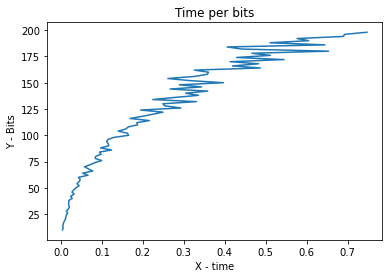

In [10]:
import matplotlib.pyplot as plt

plt.plot(norm_time, powers)
  
plt.xlabel('X - time')
plt.ylabel('Y - Bits')
  
plt.title('Time per bits')

plt.show()

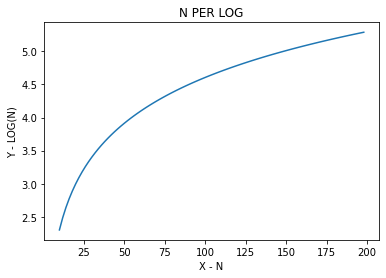

In [6]:
t_n = 10
n_list = list()
log_list = list()

while t_n < 200:
    n_list.append(t_n)
    log_list.append(float(log(t_n)))
    t_n += 2

import matplotlib.pyplot as plt

plt.plot(n_list, log_list)
  
plt.xlabel('X - N')
plt.ylabel('Y - LOG(N)')
  
plt.title('N PER LOG')

plt.show()

In [86]:
is_number_prime(9,20)

Number if freesquare!



In [88]:
find_prime_number(4,40)

Bottom border of possible prime:  9
Upper border of possible prime:  16 


Iteration  1  Not prime:  11
Iteration  2  Absolutely prime:  11


11

In [79]:
is_number_prime(11,10)

Iteration  1  Not prime:  11
Iteration  2  Absolutely prime:  11


11